In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv('data/drawndata1.csv')

In [3]:
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [4]:
X = df[['x', 'y']].values
y = df['z'] == 'a'

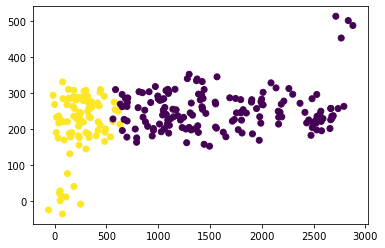

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)

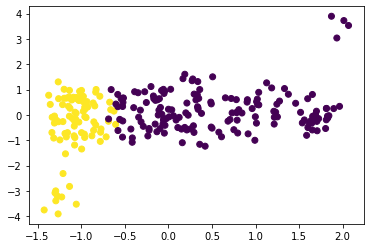

In [7]:
from sklearn.preprocessing import StandardScaler
X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)

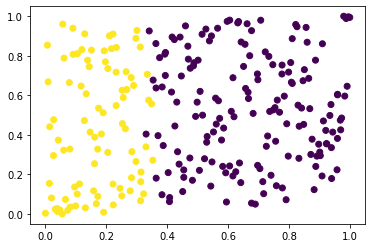

In [9]:
from sklearn.preprocessing import QuantileTransformer
X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)

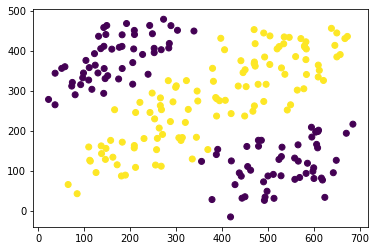

In [10]:
df = pd.read_csv('data/drawndata2.csv')
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y)

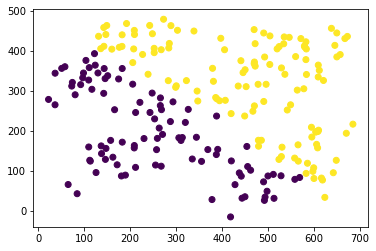

In [11]:
# trying Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    [
        ("scale", QuantileTransformer(n_quantiles=100)),
        ("model", LogisticRegression())
    ]
)

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

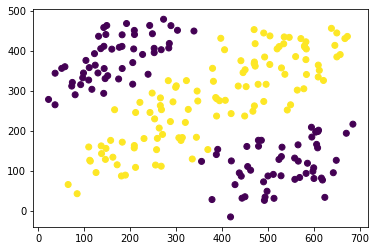

In [12]:
# adding polynomial features
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    [
        ("scale", PolynomialFeatures()),
        ("model", LogisticRegression())
    ]
)

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

In [13]:
# preprocessing categorical data

arr = np.array(["low", "low", "high", "medium"]).reshape(-1,1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [17]:
enc.transform([['zero']])

array([[0., 0., 0.]])